# Check count

In [1]:
import pandas as pd
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
for name in os.listdir(main_path):
    model_name = name.split('_')[-1]
    df = pd.read_csv(os.path.join(main_path, name, model_name+'_Hyperparameter.csv'))
    shape = df[df['Title']=='Random_Plotting'].shape
    print(name, shape)

7_ccccff (50, 11)
12_ccccfff (50, 11)
3_cccff (50, 11)
1_ccff (50, 11)
13_cccfff (50, 11)
14_ccfff (50, 11)
2_cff (50, 11)
4_cf (50, 11)
11_cccccfff (50, 11)
10_cccccff (50, 11)
5_ccf (50, 11)
6_cccf (50, 11)
8_ccccf (50, 11)
9_cccccf (50, 11)
15_cfff (50, 11)


# Architecture comparision

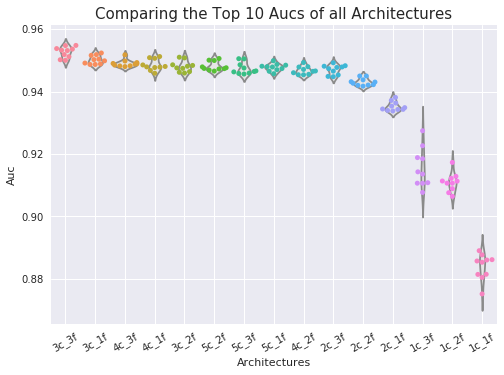

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    names.append(name_new)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting'].sort_values(by='Auc', ascending=False).head(10)['Auc'].values.tolist())
    

    
df_plot = pd.DataFrame(np.array(plot_auc).T, columns=names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top 10 Aucs of all Architectures', fontsize=15)
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.xticks(rotation=30)
plt.grid(axis='x')
plt.savefig('01_Finished_Plots/Randomized_Model_Comparision.svg')
plt.show()

# Layer Hyperspace

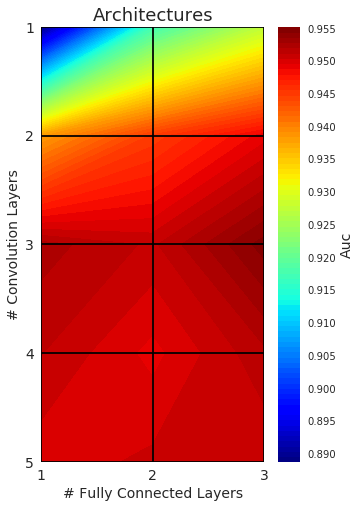

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

font_big = 18
font_small = 14

plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    names.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting']['Auc'].max())

data = np.zeros((3, 5))
for i, name in enumerate(names):
    c = -1
    f = -1
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    data[f, c] = plot_auc[i]


plt.figure(figsize=(5,8))
plt.contourf(data.T, 100, cmap='jet')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0.8, 1.0, 0.005), update_ticks=True)
cbar.ax.set_ylabel('Auc', fontsize=font_small)

plt.yticks(range(5), range(1,6), fontsize=font_small)
plt.xticks(range(3), range(1,4), fontsize=font_small)

plt.title('Architectures', fontsize=font_big)
plt.xlabel('# Fully Connected Layers', fontsize=font_small)
plt.ylabel('# Convolution Layers', fontsize=font_small)

for i in range(5):
    plt.plot([0,2], [i, i], 'k')
for i in range(3):
    plt.plot([i,i], [0, 4], 'k')

plt.savefig('01_Finished_Plots/Randomized_Model_Comparision_Hyperspace.svg')
plt.show()